In [1]:
if 1:
    import tensorflow as tf
elif 1:
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior() 

In [1]:
epochs = 20
batch_size = 512
lr = 1e-3

In [2]:
import tensorflow as tf
import numpy as np
# num_words=10000 only keep the top 10,000 most frequently occurring words in the data
a = tf.keras.datasets.reuters.load_data(num_words=10000)
print(type(a))

<class 'tuple'>


In [3]:
b, c = a
print(type(b), type(c))

<class 'tuple'> <class 'tuple'>


In [4]:
x_train, y_train_cls = b
x_test, y_test_cls = c
print(x_train.shape, y_train_cls.shape, x_test.shape, y_test_cls.shape)

(8982,) (8982,) (2246,) (2246,)


In [5]:
print(type(x_train[0]), type(x_test[0]))

<class 'list'> <class 'list'>


In [6]:
print(y_train_cls.min(), y_test_cls.min())

0 0


In [7]:
print(y_train_cls.max(), y_test_cls.max())

45 45


In [10]:
print(type(y_test_cls[0]))

<class 'numpy.int32'>


In [ ]:
import tensorflow as tf
import numpy as np
# num_words=10000 only keep the top 10,000 most frequently occurring words in the data
(x_train, y_train_cls), (x_test, y_test_cls) = tf.keras.datasets.reuters.load_data(num_words=10000)

In [8]:
# y_train_cls = y_train_cls.astype(np.int32)
# y_test_cls = y_test_cls.astype(np.int32)
word2int = tf.keras.datasets.reuters.get_word_index(path='reuters_word_index.json')
int2word = dict([(value, key) for (key, value) in word2int.items()])
print(x_train.shape, y_train_cls.shape, x_test.shape, y_test_cls.shape)

(8982,) (8982,) (2246,) (2246,)


In [11]:
# We decode the review; note that our indices were offset by 3 because
# 0 - "padding"
# 1 - "start of sequence"
# 2 - "unknown".
print(x_train[0])
print(' '.join([int2word.get(i - 3, '?') for i in x_train[0]]))
print(y_train_cls[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


In [12]:
# https://github.com/SteffenBauer/KerasTools/blob/master/Notebooks/09%201b%20Reuters%20Dataset.ipynb

import os, sys
import keras
import numpy as np
import collections
import statistics

import tensorflow as tf
tf.get_logger().setLevel('ERROR')

Using TensorFlow backend.


In [13]:
# Step 1

# Load the Reuters dataset, Dataset of 11,228 newswires from Reuters, labeled over 46 topics.
# 
# It is split into training and test set of 8982 / 2246 entries.
# The words are tokenized into integer encoding.

(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data()

print(train_data.shape)
print(test_data.shape)
print(max(len(e) for e in train_data))

(8982,)
(2246,)
2376


In [14]:
# Step 2

# Show raw data of training set entry '0'
# train_data: Tokenized newswire entry
# train_label: Category of newswire

print("Raw training entry No 0: {}".format(train_data[0]))
print
print("Raw training label No 0: '{}'".format(train_labels[0]))

Raw training entry No 0: [1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Raw training label No 0: '3'


In [15]:
# Step 3

# Use the tokenizer word encoding dictionary to reconstruct the original review text.
#
# Note: Tokens 0, 1, and 2 are reserved for 'padding', 'start of sequence', and 'unknown word'

raw_word_index = keras.datasets.reuters.get_word_index()
word_index = {v+3:k for k,v in raw_word_index.items()}
word_index[0] = '-PAD-'
word_index[1] = '-START-'
word_index[2] = '-UNK-'

# Reconstruct train data entry as string
entry = 202
print("Newswire category: {}".format(train_labels[entry]))
print(" ".join(word_index.get(w, 2) for w in train_data[entry]))

Newswire category: 21
-START- high labour costs and slower corporate investment could hinder sweden's economic growth after 1987 the organisation for economic cooperation and development oecd said the swedish economy grew at a slower rate in 1986 than in previous years gdp rose about 1 7 pct in 1986 compared with 2 2 pct in 1985 but this growth depended largely on external factors particularly lower oil prices the oecd secretariat said in its latest annual report on sweden it warned that labour costs had risen more rapidly in sweden than in other oecd countries because of high labour costs swedish industry which largely relies upon export markets was losing market share wages in the manufacturing sector grew by seven pct in 1986 in line with 1985 increases while public sector wages rose an estimated 9 2 pct in 1986 up from six pct in 1985 this was significantly higher than average wage increases of 3 75 pct for the seven largest members of the oecd in 1986 the report said wage moderati

In [16]:
# Step 4

# Sort newswire texts according to class labels
# and print all of a certain category

category = 5

train_elabels = [(c, i) for i,c in enumerate(train_labels)]
cat = [e[1] for e in filter(lambda x: x[0]==category, train_elabels)]
print("Number of entries for category {}: {}".format(category, len(cat)))
print()
for c in cat:
    print(" ".join(word_index.get(w, 2) for w in train_data[c]))
    print()

Number of entries for category 5: 17

-START- the european commission's decision to release an additional 300 000 tonnes of british intervention feed wheat for the home market will provide only moderate relief in an increasingly tight market traders said some operators had been anticipating a larger tonnage pointing out that at this week's u k intervention tender the market sought to buy 340 000 tonnes but only 126 000 tonnes were granted the new tranche of intervention grain is unlikely to satisfy demand they said and keen buying competition for supplies in stores is expected to keep prices firm the release of the feed wheat followed recent strong representations by the u k grain trade to the commission there has been growing concern that rising internal prices triggered by heavy exports were creating areas of shortage in interior markets the latest ec authorisation will add 70 000 tonnes at the april 14 tender and a further 30 000 tonnes later in the month the remaining 200 000 tonne

In [17]:
# Step 5

# Generate statistics over all 46 classes

mapping = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
           'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
           'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
           'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
           'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

train_count = collections.Counter(train_labels)
test_count = collections.Counter(test_labels)
total_words = [statistics.mean([len(e) for e in train_data[train_labels.flatten() == i]]) for i in range(46)]

print("{:5s} {:20s} {:5s} {:5s}  {:7s}".format(" "    ," "         , "Nr of", "docs", "Mean nr of words"))
print("{:5s} {:20s} {:5s}  {:5s} {:7s}".format("Index","Class name", "train", "test", "in train set"))
for i in range(46):
    print("{:5d} {:20s} {:5d} {:5d}   {:6.2f}".format(i,mapping[i], train_count[i], test_count[i], total_words[i]))

                           Nr of docs   Mean nr of words
Index Class name           train  test  in train set
    0 cocoa                   55    12   225.78
    1 grain                  432   105   188.67
    2 veg-oil                 74    20   184.86
    3 earn                  3159   813    87.67
    4 acq                   1949   474   135.83
    5 wheat                   17     5   213.35
    6 copper                  48    14   154.46
    7 housing                 16     3   180.38
    8 money-supply           139    38   191.48
    9 coffee                 101    25   225.87
   10 sugar                  124    30   184.73
   11 trade                  390    83   253.80
   12 reserves                49    13   186.92
   13 ship                   172    37   164.66
   14 cotton                  26     2   142.69
   15 carcass                 20     9   170.45
   16 crude                  444    99   219.79
   17 nat-gas                 39    12   149.82
   18 cpi                 

In [18]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results
x_train = vectorize_sequences(x_train) 
x_test = vectorize_sequences(x_test) 
print(x_train.shape, y_train_cls.shape, x_test.shape, y_test_cls.shape)

(8982, 10000) (8982,) (2246, 10000) (2246,)


In [19]:
y_train = np.squeeze(np.eye(46)[y_train_cls]).astype(np.int32)
y_test = np.squeeze(np.eye(46)[y_test_cls]).astype(np.int32)
print(x_train.shape, y_train.shape, y_train_cls.shape, x_test.shape, y_test.shape, y_test_cls.shape)

(8982, 10000) (8982, 46) (8982,) (2246, 10000) (2246, 46) (2246,)


In [6]:
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [7]:
x = tf.placeholder(tf.float32, (None, 10000)) 
y = tf.placeholder(tf.int32, (None, 46)) 
y_cls = tf.placeholder(tf.int32, (None,)) 

init_b = tf.keras.initializers.constant(0.0)
init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg')

b1 = tf.get_variable('b1', (64,), tf.float32, init_b)
w1 = tf.get_variable('w1', (10000,64), tf.float32, init_w)

b2 = tf.get_variable('b2', (64,), tf.float32, init_b)
w2 = tf.get_variable('w2', (64,64), tf.float32, init_w)

b3 = tf.get_variable('b3', (46,), tf.float32, init_b)
w3 = tf.get_variable('w3', (64,46), tf.float32, init_w)

x1 = tf.nn.relu(x @ w1 + b1) 
x2 = tf.nn.relu(x1 @ w2 + b2) 
logits = x2 @ w3 + b3
y_pred_cls = tf.cast(tf.argmax(logits, axis=1), tf.int32, name='y_pred_cls') 

entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits) 
loss = tf.reduce_mean(entropy) 
train = tf.train.RMSPropOptimizer(lr).minimize(loss)

correct = tf.nn.in_top_k(logits, y_cls, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
def shuffle_batch(x, y, y_cls, batch_size):
    rnd_idx = np.random.permutation(len(x))
    n_batches = len(x) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        yield x[batch_idx], y[batch_idx], y_cls[batch_idx]

In [9]:
with tf.Session() as sess:
    init.run()
    #saver.restore(sess, 'save/nn.ckpt')
    
    loss_trace = []
    accuracy_trace = []

    for i in range(epochs):
        print()
        print('epoch {}/{}'.format(i, epochs), end=' ')
        for x_batch, y_batch, y_batch_cls in shuffle_batch(x_train, y_train, y_train_cls, batch_size):
            feed_dict = {x: x_batch, y: y_batch, y_cls: y_batch_cls}
            loss_run, accuracy_run, _ = sess.run([loss, accuracy, train], feed_dict=feed_dict)
            loss_trace.append(loss_run)
            accuracy_trace.append(accuracy_run)

    feed_dict = {x: x_test, y: y_test, y_cls: y_test_cls}
    accuracy_run, y_test_pred_cls = sess.run([accuracy, y_pred_cls], feed_dict=feed_dict)
    
    saver.save(sess, 'save/nn.ckpt')


epoch 0/20 
epoch 1/20 
epoch 2/20 
epoch 3/20 
epoch 4/20 
epoch 5/20 
epoch 6/20 
epoch 7/20 
epoch 8/20 
epoch 9/20 
epoch 10/20 
epoch 11/20 
epoch 12/20 
epoch 13/20 
epoch 14/20 
epoch 15/20 
epoch 16/20 
epoch 17/20 
epoch 18/20 
epoch 19/20 

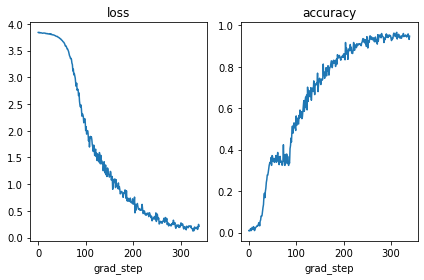

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(loss_trace)
ax2.plot(accuracy_trace)
ax1.set_title('loss')
ax2.set_title('accuracy')
ax1.set_xlabel('grad_step')
ax2.set_xlabel('grad_step')
plt.tight_layout()
plt.show()

In [11]:
print('Test Accuracy :', accuracy_run)

Test Accuracy : 0.7960819


In [12]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_true=y_test_cls, y_pred=y_test_pred_cls)
print(cm)

[[ 9  1  0 ...  0  0  0]
 [ 0 85  0 ...  0  0  0]
 [ 0  2 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  1]]
